In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Veri setini yükleyelim
data = pd.read_csv("heart.csv")

# Veri setinin ilk 5 satırını görelim
print("Veri setinin ilk 5 satırı:")
print(data.head())

# Veri setinin genel bilgileri
print("\nVeri setinin genel bilgileri:")
print(data.info())

# Veri setindeki özet istatistikler
print("\nVeri setinin özet istatistikleri:")
print(data.describe())

# Veri setindeki eksik değerleri kontrol edelim
print("\nVeri setindeki eksik değerler:")
print(data.isnull().sum())


Veri setinin ilk 5 satırı:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Veri setinin genel bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  

C:\Users\yalim\AppData\Local\Temp\ipykernel_6416\1474514227.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


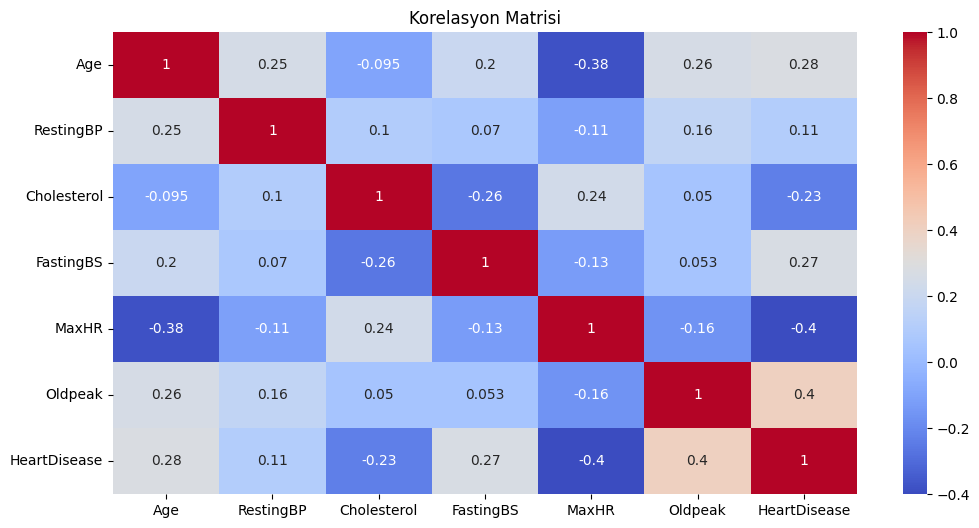

In [2]:
# Verinin genel bir dağılımını görelim
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

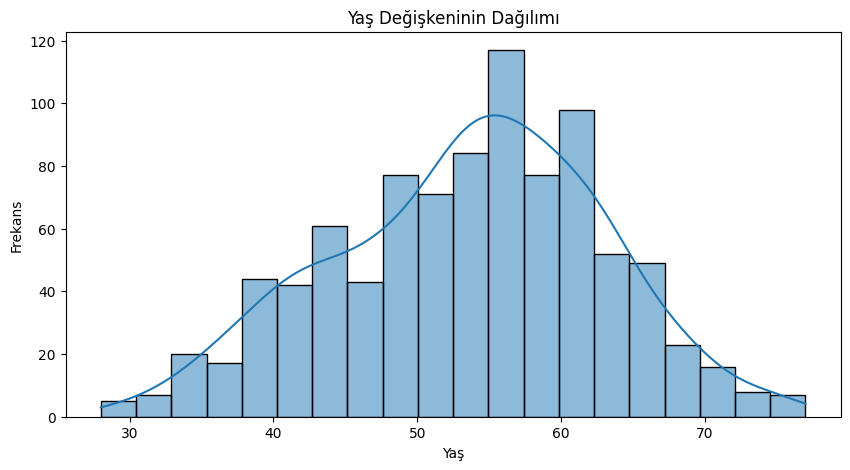

In [3]:
# Yaş değişkeninin histogramını çizelim
plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title("Yaş Değişkeninin Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()

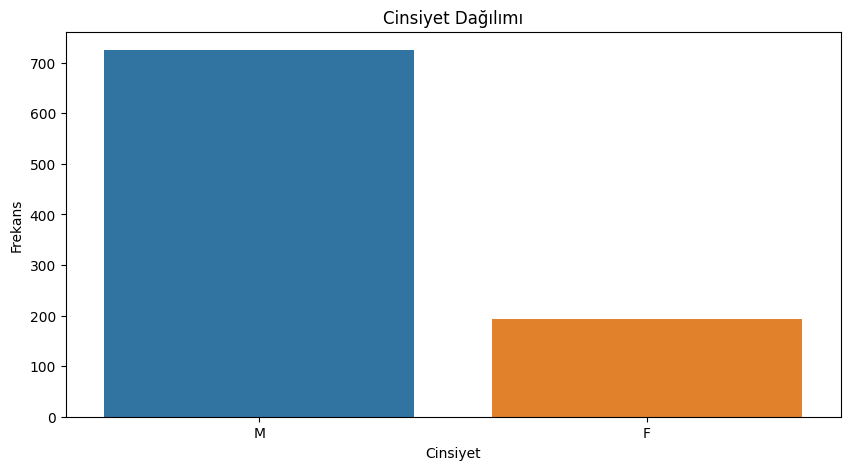

In [4]:
# Cinsiyet dağılımı
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', data=data)
plt.title("Cinsiyet Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Frekans")
plt.show()

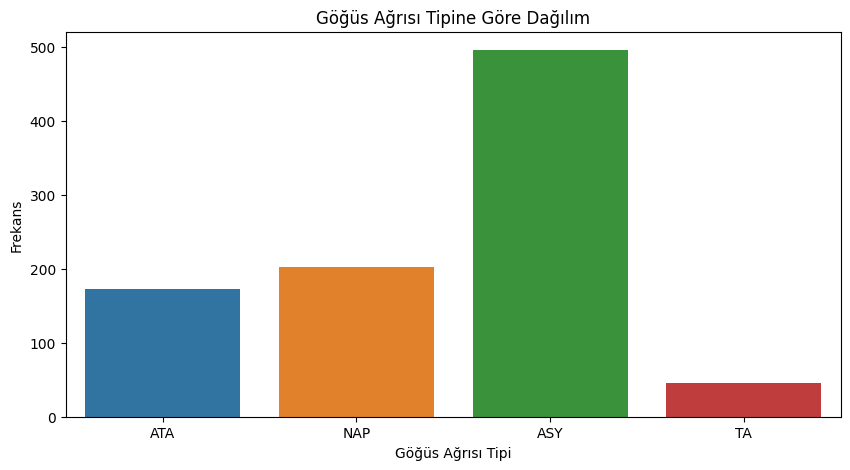

In [5]:
# Göğüs ağrısı tipine göre dağılım
plt.figure(figsize=(10, 5))
sns.countplot(x='ChestPainType', data=data)
plt.title("Göğüs Ağrısı Tipine Göre Dağılım")
plt.xlabel("Göğüs Ağrısı Tipi")
plt.ylabel("Frekans")
plt.show()

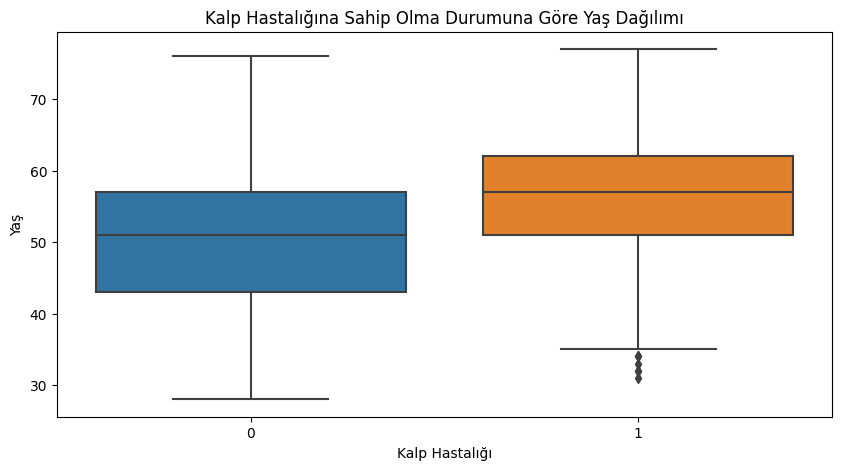

In [6]:
# Kalp hastalığına sahip olma durumuna göre yaş dağılımı
plt.figure(figsize=(10, 5))
sns.boxplot(x='HeartDisease', y='Age', data=data)
plt.title("Kalp Hastalığına Sahip Olma Durumuna Göre Yaş Dağılımı")
plt.xlabel("Kalp Hastalığı")
plt.ylabel("Yaş")
plt.show()

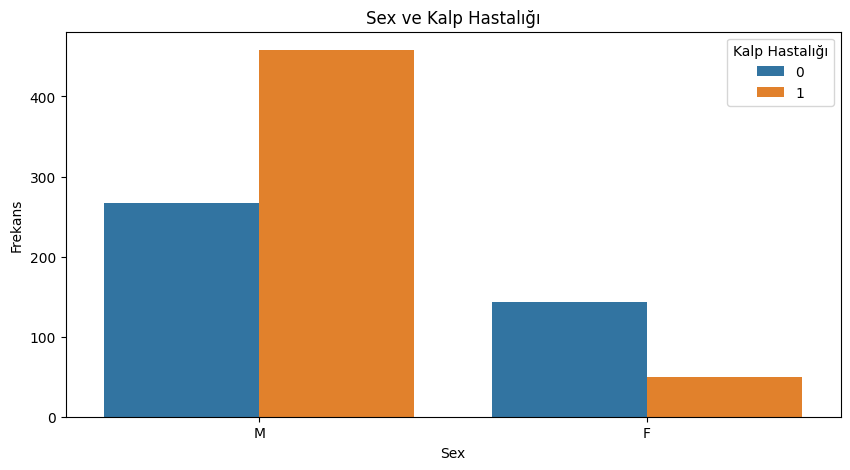

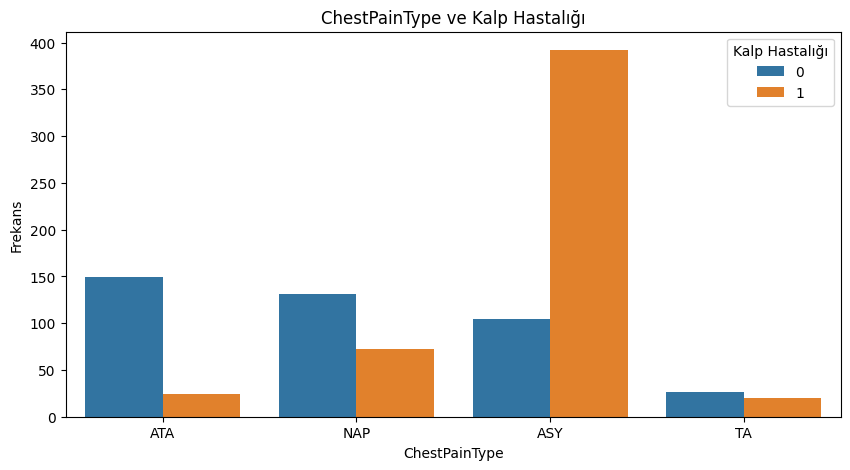

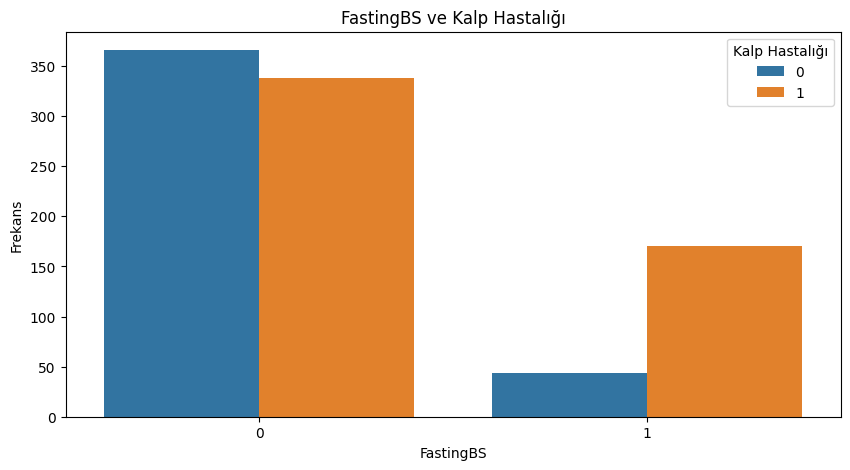

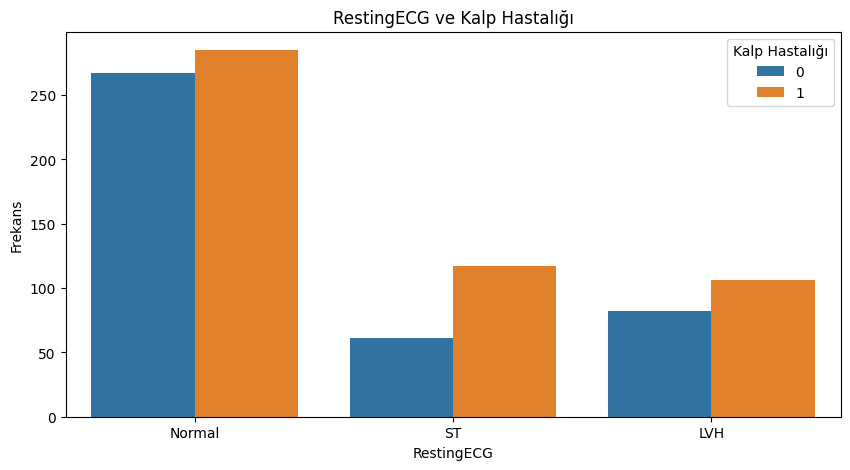

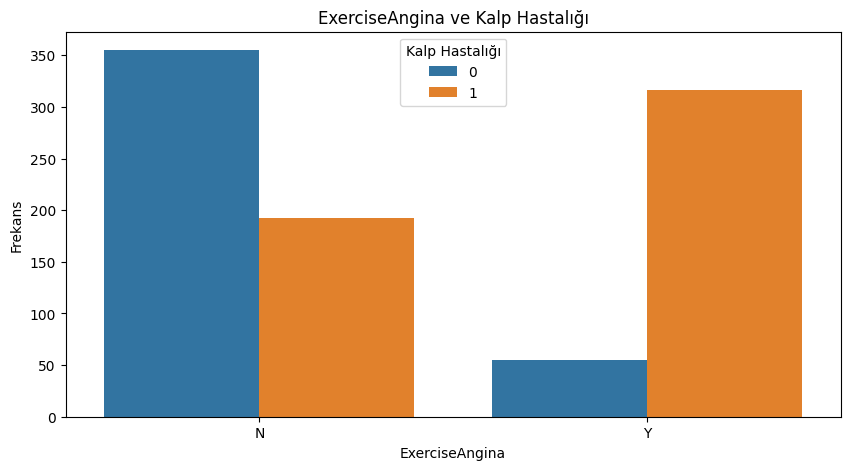

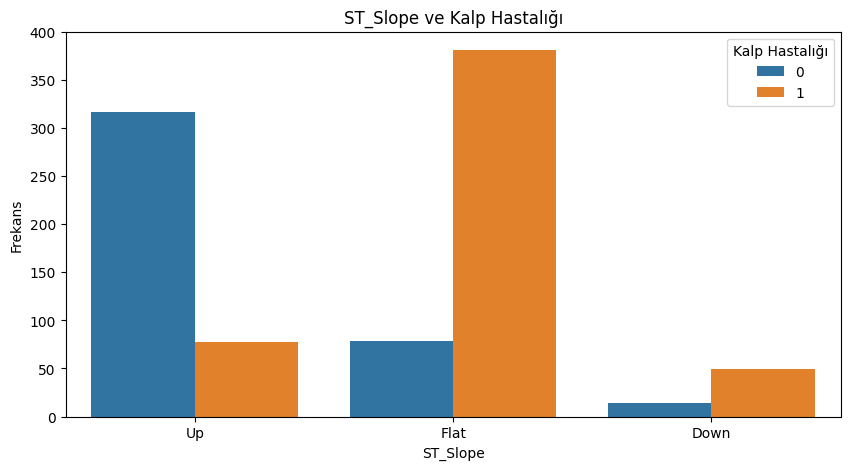

In [7]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='HeartDisease', data=data)
    plt.title(f"{feature} ve Kalp Hastalığı")
    plt.xlabel(feature)
    plt.ylabel("Frekans")
    plt.legend(title='Kalp Hastalığı')
    plt.show()


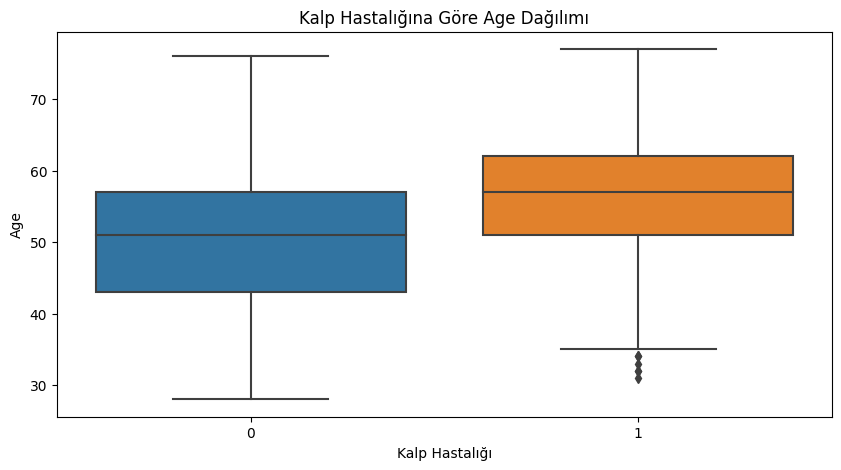

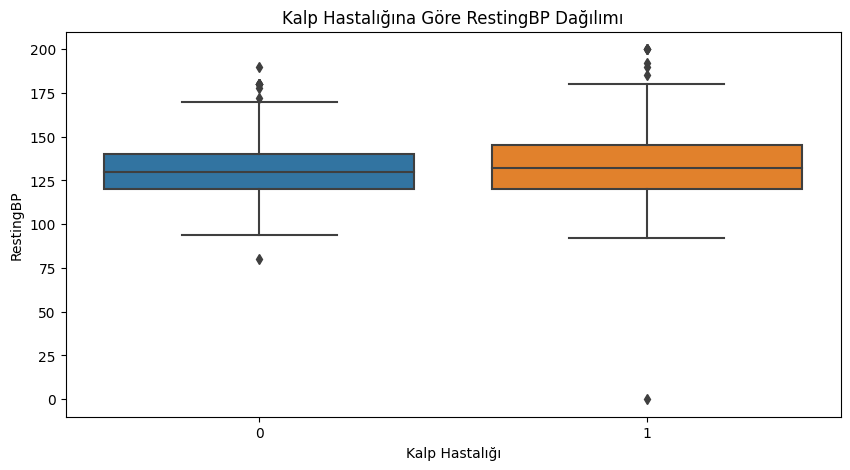

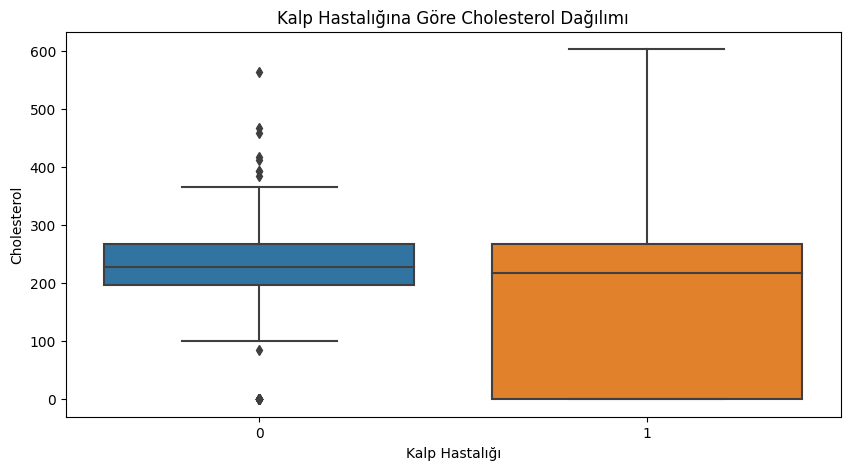

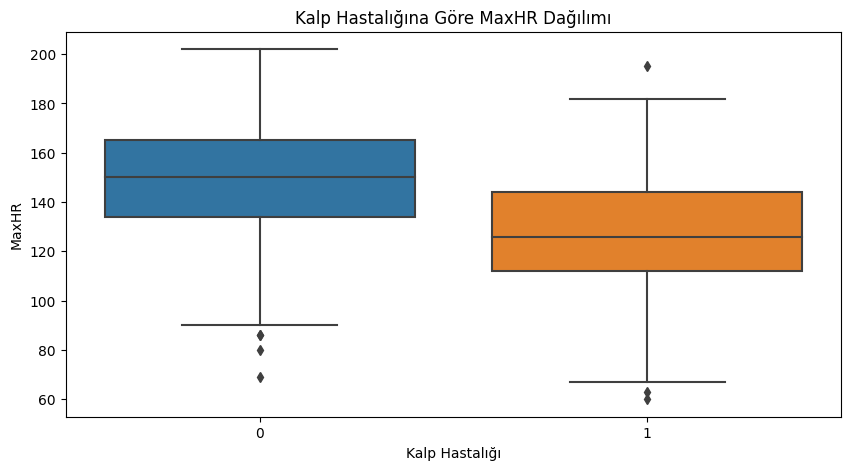

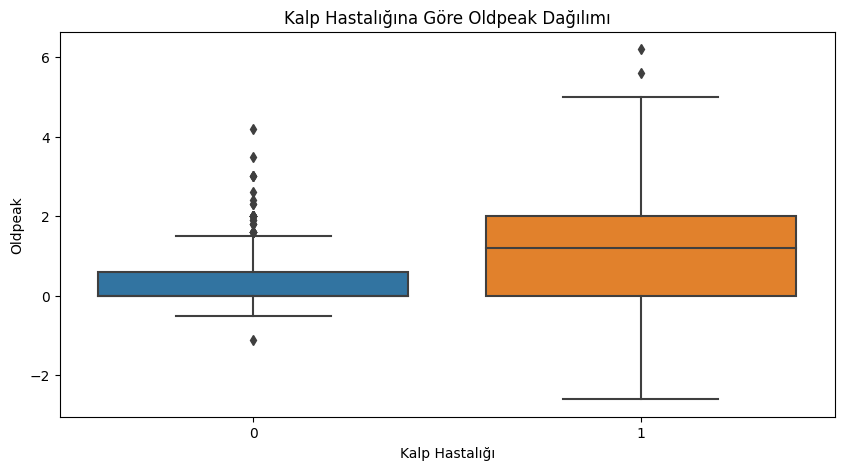

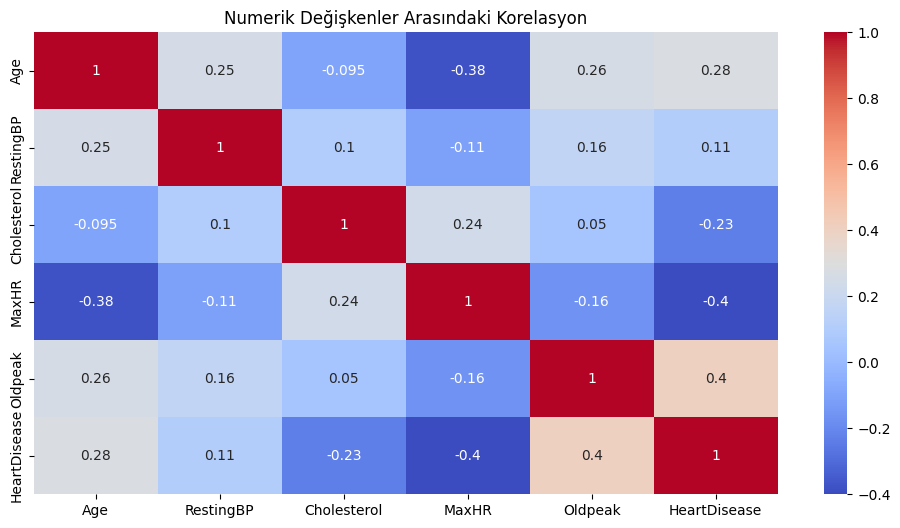

In [8]:
# Numerik değişkenlerin kalp hastalığı ile ilişkisini inceleyelim
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='HeartDisease', y=feature, data=data)
    plt.title(f"Kalp Hastalığına Göre {feature} Dağılımı")
    plt.xlabel("Kalp Hastalığı")
    plt.ylabel(feature)
    plt.show()

# Numerik değişkenler arasındaki korelasyonu inceleyelim
plt.figure(figsize=(12, 6))
sns.heatmap(data[numerical_features + ['HeartDisease']].corr(), annot=True, cmap='coolwarm')
plt.title("Numerik Değişkenler Arasındaki Korelasyon")
plt.show()

In [9]:
# Skewness ve Kurtosis değerlerini hesaplayalım
for feature in numerical_features:
    skewness = data[feature].skew()
    kurtosis = data[feature].kurt()
    print(f"{feature} için Skewness: {skewness}, Kurtosis: {kurtosis}")

Age için Skewness: -0.19593302867569365, Kurtosis: -0.3861396123864571
RestingBP için Skewness: 0.1798393100516288, Kurtosis: 3.2712509168295356
Cholesterol için Skewness: -0.6100864307268192, Kurtosis: 0.11820846851766742
MaxHR için Skewness: -0.14435941846180994, Kurtosis: -0.4482478199521531
Oldpeak için Skewness: 1.0228720218107528, Kurtosis: 1.2030636840120112


In [10]:
# Verinin bazı temel istatistiklerini hesaplayalım
mean_values = data.mean()
variance_values = data.var()
std_dev_values = data.std()

print("\nOrtalama Değerler:")
print(mean_values)

print("\nVaryans Değerleri:")
print(variance_values)

print("\nStandart Sapma Değerleri:")
print(std_dev_values)

# Veri setindeki kategorik değişkenleri sayısal değerlere çevirelim
data_encoded = pd.get_dummies(data, drop_first=True)

# Mahalanobis mesafesini hesaplayalım
def mahalanobis_distance(df, cov_matrix):
    df_mean = df.mean(axis=0)
    diff = df - df_mean
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    left_term = np.dot(diff, inv_cov_matrix)
    mahalanobis_dist = np.dot(left_term, diff.T)
    return mahalanobis_dist.diagonal()

# Kategorik değişkenler encode edildikten sonra kovaryans matrisini hesaplayalım
cov_matrix = np.cov(data_encoded, rowvar=False)
mahalanobis_dist = mahalanobis_distance(data_encoded, cov_matrix)
print("\nMahalanobis Mesafesi:")
print(mahalanobis_dist)

# Euclidean, Manhattan ve Minkowski mesafelerini hesaplayalım
from scipy.spatial.distance import euclidean, cityblock, minkowski

# İlk iki gözlem arasındaki mesafeleri hesaplayalım
obs1 = data_encoded.iloc[0]
obs2 = data_encoded.iloc[1]

euclidean_dist = euclidean(obs1, obs2)
manhattan_dist = cityblock(obs1, obs2)
minkowski_dist = minkowski(obs1, obs2, p=3)

print(f"\nİlk iki gözlem arasındaki Euclidean mesafesi: {euclidean_dist}")
print(f"İlk iki gözlem arasındaki Manhattan mesafesi: {manhattan_dist}")
print(f"İlk iki gözlem arasındaki Minkowski mesafesi: {minkowski_dist}")

# Hamming mesafesini hesaplayalım
def hamming_distance(row1, row2):
    return sum(el1 != el2 for el1, el2 in zip(row1, row2)) / len(row1)

hamming_dist = hamming_distance(obs1, obs2)
print(f"İlk iki gözlem arasındaki Hamming mesafesi: {hamming_dist}")


Ortalama Değerler:
Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64

Varyans Değerleri:
Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64

Standart Sapma Değerleri:
Age               9.432617
RestingBP        18.514154
Cholesterol     109.384145
FastingBS         0.423046
MaxHR            25.460334
Oldpeak           1.066570
HeartDisease      0.497414
dtype: float64

Mahalanobis Mesafesi:
[ 7.83546567 18.37921076 22.23415865 10.73407904  9.36025943  9.81213534
  8.1095555   7.96464022  7.90653674 11.21749349 12.14354508 18.02495662
  7.1185421   4.80925118 16.35745172 14.69184653 12.03765557  8.41359144
 11.18460294 22.42372557 30.43510172 13.18871432  8.23806232 18.1

C:\Users\yalim\AppData\Local\Temp\ipykernel_6416\3444774757.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = data.mean()
C:\Users\yalim\AppData\Local\Temp\ipykernel_6416\3444774757.py:3: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance_values = data.var()
C:\Users\yalim\AppData\Local\Temp\ipykernel_6416\3444774757.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Selec

In [11]:
# Veri setindeki istatistiksel değerler
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Ortalamalar
mean_values = data[numerical_features].mean()
print("Ortalama Değerler:\n", mean_values)

# Varyanslar
variance_values = data[numerical_features].var()
print("\nVaryans Değerleri:\n", variance_values)

# Standart Sapmalar
std_dev_values = data[numerical_features].std()
print("\nStandart Sapma Değerleri:\n", std_dev_values)

# Skewness ve Kurtosis
skewness_values = data[numerical_features].skew()
print("\nSkewness Değerleri:\n", skewness_values)

kurtosis_values = data[numerical_features].kurt()
print("\nKurtosis Değerleri:\n", kurtosis_values)

Ortalama Değerler:
 Age             53.510893
RestingBP      132.396514
Cholesterol    198.799564
MaxHR          136.809368
Oldpeak          0.887364
dtype: float64

Varyans Değerleri:
 Age               88.974254
RestingBP        342.773903
Cholesterol    11964.891079
MaxHR            648.228614
Oldpeak            1.137572
dtype: float64

Standart Sapma Değerleri:
 Age              9.432617
RestingBP       18.514154
Cholesterol    109.384145
MaxHR           25.460334
Oldpeak          1.066570
dtype: float64

Skewness Değerleri:
 Age           -0.195933
RestingBP      0.179839
Cholesterol   -0.610086
MaxHR         -0.144359
Oldpeak        1.022872
dtype: float64

Kurtosis Değerleri:
 Age           -0.386140
RestingBP      3.271251
Cholesterol    0.118208
MaxHR         -0.448248
Oldpeak        1.203064
dtype: float64


In [12]:
# Veri setindeki kategorik değişkenleri sayısal değerlere çevirelim
data_encoded = pd.get_dummies(data, drop_first=True)

# Euclidean, Manhattan ve Minkowski mesafelerini hesaplayalım
from scipy.spatial.distance import euclidean, cityblock, minkowski

# İlk iki gözlem arasındaki mesafeleri hesaplayalım
obs1 = data_encoded.iloc[0]
obs2 = data_encoded.iloc[1]

euclidean_dist = euclidean(obs1, obs2)
manhattan_dist = cityblock(obs1, obs2)
minkowski_dist = minkowski(obs1, obs2, p=3)

print(f"\nİlk iki gözlem arasındaki Euclidean mesafesi: {euclidean_dist}")
print(f"İlk iki gözlem arasındaki Manhattan mesafesi: {manhattan_dist}")
print(f"İlk iki gözlem arasındaki Minkowski mesafesi: {minkowski_dist}")

# Hamming mesafesini hesaplayalım
def hamming_distance(row1, row2):
    return sum(el1 != el2 for el1, el2 in zip(row1, row2)) / len(row1)

hamming_dist = hamming_distance(obs1, obs2)
print(f"İlk iki gözlem arasındaki Hamming mesafesi: {hamming_dist}")

# Mahalanobis mesafesini hesaplayalım
def mahalanobis_distance(df, cov_matrix):
    df_mean = df.mean(axis=0)
    diff = df - df_mean
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    left_term = np.dot(diff, inv_cov_matrix)
    mahalanobis_dist = np.dot(left_term, diff.T)
    return mahalanobis_dist.diagonal()

cov_matrix = np.cov(data_encoded, rowvar=False)
mahalanobis_dist = mahalanobis_distance(data_encoded, cov_matrix)
print("\nMahalanobis Mesafesi:")
print(mahalanobis_dist)



İlk iki gözlem arasındaki Euclidean mesafesi: 112.36102527122117
İlk iki gözlem arasındaki Manhattan mesafesi: 161.0
İlk iki gözlem arasındaki Minkowski mesafesi: 109.35883200469547
İlk iki gözlem arasındaki Hamming mesafesi: 0.6875

Mahalanobis Mesafesi:
[ 7.83546567 18.37921076 22.23415865 10.73407904  9.36025943  9.81213534
  8.1095555   7.96464022  7.90653674 11.21749349 12.14354508 18.02495662
  7.1185421   4.80925118 16.35745172 14.69184653 12.03765557  8.41359144
 11.18460294 22.42372557 30.43510172 13.18871432  8.23806232 18.19153942
  8.36638344  9.47352308 21.12490302  9.45831153 16.85872175  6.23002522
 25.18808911  8.98847834  8.02493618 14.8979711  10.32922293  9.04958504
 12.18752698 15.55001234 17.66824214 15.32210284 10.22162497 24.36483174
 10.1687101  12.88475453  5.510514   14.61650114  9.00859465  7.42158345
 17.07787004 13.40227964  4.27048066 13.55810453 14.52360382  8.5076632
 15.13033999 12.09091716 11.28328908 16.13048348 15.30171969 14.22132429
  9.96595842 1

C:\Users\yalim\AppData\Local\Temp\ipykernel_6416\4167019196.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


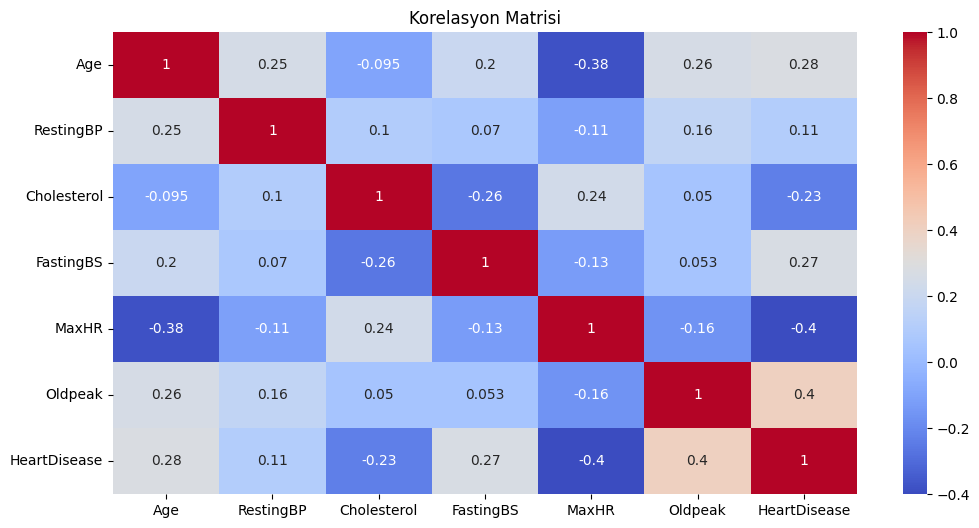

Regresyon katsayıları:  [-1.03120752]
Regresyon sabiti:  191.99020374901625


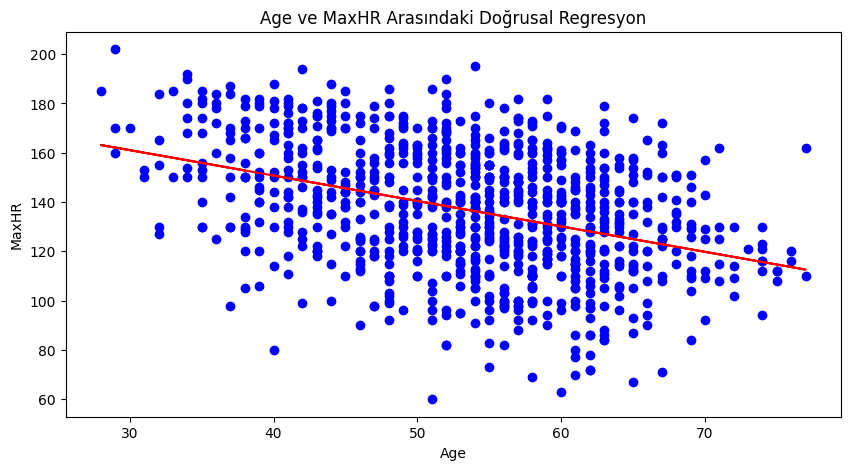

In [13]:
# Korelasyon matrisi
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

# Basit doğrusal regresyon (Age ile MaxHR arasındaki ilişkiyi inceleyelim)
from sklearn.linear_model import LinearRegression

# Modeli oluştur ve eğit
X = data[['Age']].values
y = data['MaxHR'].values
model = LinearRegression().fit(X, y)

# Regresyon katsayıları
print("Regresyon katsayıları: ", model.coef_)
print("Regresyon sabiti: ", model.intercept_)

# Tahminler
y_pred = model.predict(X)

# Regresyon doğrusu
plt.figure(figsize=(10, 5))
plt.scatter(data['Age'], data['MaxHR'], color='blue')
plt.plot(data['Age'], y_pred, color='red')
plt.title("Age ve MaxHR Arasındaki Doğrusal Regresyon")
plt.xlabel("Age")
plt.ylabel("MaxHR")
plt.show()


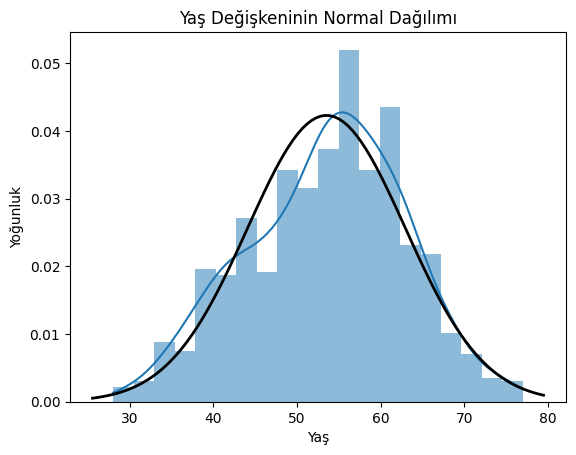

In [14]:
# Yaş değişkeninin dağılımını normal dağılımla karşılaştıralım
sns.histplot(data['Age'], bins=20, kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(data['Age'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Yaş Değişkeninin Normal Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.show()


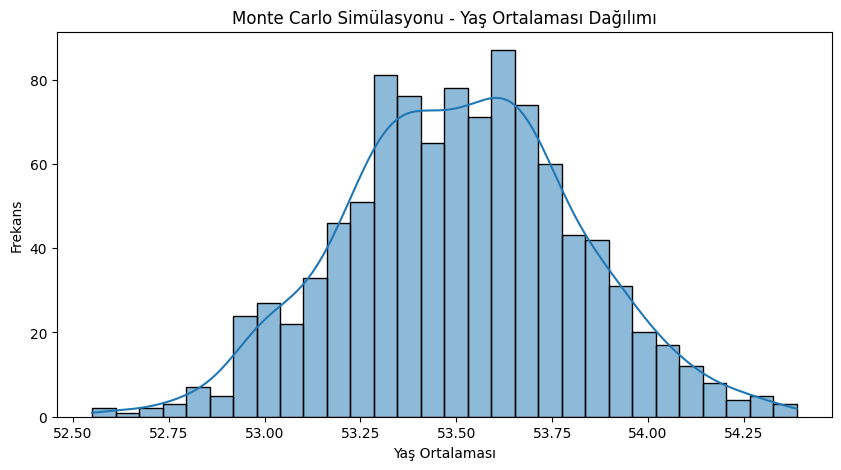

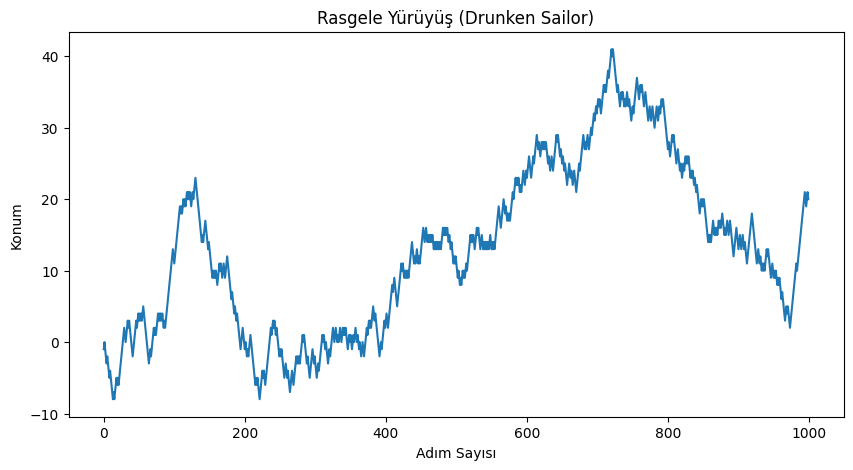

In [16]:
# Monte Carlo Simülasyonu
# Amaç: Yaş ortalamasının 1000 farklı örneklemdeki dağılımını görmek
np.random.seed(42)
simulations = 1000
sample_size = len(data)
simulated_means = []

for _ in range(simulations):
    sample = np.random.choice(data['Age'], sample_size, replace=True)
    simulated_means.append(np.mean(sample))

plt.figure(figsize=(10, 5))
sns.histplot(simulated_means, bins=30, kde=True)
plt.title("Monte Carlo Simülasyonu - Yaş Ortalaması Dağılımı")
plt.xlabel("Yaş Ortalaması")
plt.ylabel("Frekans")
plt.show()

# Rasgele Yürüyüş (Drunken Sailor)
np.random.seed(42)
n_steps = 1000
steps = np.random.choice([-1, 1], size=n_steps)
random_walk = np.cumsum(steps)

plt.figure(figsize=(10, 5))
plt.plot(random_walk)
plt.title("Rasgele Yürüyüş (Drunken Sailor)")
plt.xlabel("Adım Sayısı")
plt.ylabel("Konum")
plt.show()
